In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pickle

In [2]:
df = pd.read_csv("censu_regressao_tratado.csv")

In [3]:
len(df)

74001

In [4]:
df.isnull().sum()

TractId               0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income                0
IncomeErr             0
IncomePerCap          0
IncomePerCapErr       0
Poverty               0
ChildPoverty          0
Professional          0
Service               0
Office                0
Construction          0
Production            0
Drive                 0
Carpool               0
Transit               0
Walk                  0
OtherTransp           0
WorkAtHome            0
MeanCommute           0
Employed              0
PrivateWork           0
PublicWork            0
SelfEmployed          0
FamilyWork            0
Unemployment        810
dtype: int64

In [5]:
df.head(5)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [6]:
df_target = df[['Income']]

In [7]:
df = df.drop(['Income'], axis = 1)

In [8]:
np.unique(df_target['Income'], return_counts = True)

(array([     0,   2692,   2702, ..., 248438, 249219, 249750]),
 array([1116,    1,    1, ...,    1,    1,    1]))

In [13]:
df.columns

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [14]:
df = df.drop(['TractId','County', 'Unemployment'],axis = 1)

In [15]:
np.unique(df['State'], return_counts = True)

(array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
        'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 array([1181,  167, 1526,  686, 8057, 1249,  833,  218,  179, 4245, 1969,
         351,  298, 3123, 1511,  825,  770, 1115, 1148,  358, 1406, 1478,
        2813, 1338,  664, 1393,  271,  532,  687,  295, 2010,  499, 4918,
        2195,

In [16]:
np.unique(df['Men'], return_counts = True)

(array([    0,     1,     2, ..., 22181, 28658, 32266]),
 array([715,   1,   2, ...,   1,   1,   1]))

In [17]:
df[['Men','Women']]

,Men,Women
0,899,946
1,1167,1005
2,1533,1852
3,2001,2266
4,5054,4911
...,...,...
73996,3035,2976
73997,959,1383
73998,1001,1217
73999,1964,2416


In [18]:
np.unique(df['Women'], return_counts = True)

(array([    0,     1,     2, ..., 21778, 25563, 33262]),
 array([758,   2,   5, ...,   1,   1,   1]))

In [19]:
df = df.drop(['Men','Women'],axis = 1)

In [20]:
np.unique(df['Hispanic'], return_counts = True)

(array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ]),
 array([2937,  305,  520, ...,   29,   14,  316]))

In [21]:
np.unique(df['White'], return_counts = True)

(array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ]),
 array([1313,   68,  101, ...,   21,   16,  101]))

In [22]:
np.unique(df['Native'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [23]:
np.unique(df['Asian'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [24]:
np.unique(df['Pacific'], return_counts = True)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.6, 12.7,
        12.8, 12.9, 13. , 13.8, 13.9, 14. , 14.2, 14.4, 14.8, 14.9, 15. ,
        15.1, 15.3, 15.7, 15.9, 16. , 16.1, 16.2, 16.5, 16.6, 16.9, 17.1,
        18.7, 19.6, 20.1, 20.4, 20.9, 

In [25]:
np.unique(df['VotingAgeCitizen'], return_counts = True)

(array([    0,     1,     2, ..., 29963, 32179, 39389]),
 array([698,   1,   2, ...,   1,   1,   1]))

In [26]:
np.unique(df['IncomeErr'], return_counts = True)

(array([     0,    728,    765, ..., 119997, 121422, 153365]),
 array([1116,    1,    1, ...,    1,    1,    1]))

In [27]:
np.unique(df['IncomePerCap'], return_counts = True)

(array([     0,     32,     38, ..., 202920, 209285, 220253]),
 array([745,   1,   1, ...,   1,   1,   1]))

In [28]:
np.unique(df['IncomePerCapErr'], return_counts = True)

(array([     0,     20,     31, ...,  84414, 100495, 134017]),
 array([745,   1,   1, ...,   1,   1,   1]))

In [29]:
np.unique(df['Poverty'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [30]:
np.unique(df['ChildPoverty'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [31]:
np.unique(df['Professional'], return_counts = True)

(array([  0. ,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.7,   1.8,
          1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
          2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
          3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
          4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
          5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
          6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
          7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
          8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
          9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
         10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,  10.8,
         10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,  11.7,
         11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,  12.6,
         12.7,  12.8,  12.9,  13. ,  13.1,  13.2,  13.3,  13.4,  13.5,
      

In [32]:
np.unique(df['Service'], return_counts = True)

(array([  0. ,   0.5,   0.6,   0.7,   0.8,   0.9,   1. ,   1.1,   1.2,
          1.3,   1.4,   1.5,   1.6,   1.7,   1.8,   1.9,   2. ,   2.1,
          2.2,   2.3,   2.4,   2.5,   2.6,   2.7,   2.8,   2.9,   3. ,
          3.1,   3.2,   3.3,   3.4,   3.5,   3.6,   3.7,   3.8,   3.9,
          4. ,   4.1,   4.2,   4.3,   4.4,   4.5,   4.6,   4.7,   4.8,
          4.9,   5. ,   5.1,   5.2,   5.3,   5.4,   5.5,   5.6,   5.7,
          5.8,   5.9,   6. ,   6.1,   6.2,   6.3,   6.4,   6.5,   6.6,
          6.7,   6.8,   6.9,   7. ,   7.1,   7.2,   7.3,   7.4,   7.5,
          7.6,   7.7,   7.8,   7.9,   8. ,   8.1,   8.2,   8.3,   8.4,
          8.5,   8.6,   8.7,   8.8,   8.9,   9. ,   9.1,   9.2,   9.3,
          9.4,   9.5,   9.6,   9.7,   9.8,   9.9,  10. ,  10.1,  10.2,
         10.3,  10.4,  10.5,  10.6,  10.7,  10.8,  10.9,  11. ,  11.1,
         11.2,  11.3,  11.4,  11.5,  11.6,  11.7,  11.8,  11.9,  12. ,
         12.1,  12.2,  12.3,  12.4,  12.5,  12.6,  12.7,  12.8,  12.9,
      

In [33]:
np.unique(df['Office'], return_counts = True)

(array([  0. ,   0.9,   1. ,   1.1,   1.3,   1.5,   1.8,   2.4,   2.5,
          3.2,   3.3,   3.4,   3.5,   3.7,   3.8,   3.9,   4. ,   4.3,
          4.4,   4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,
          5.3,   5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
         12.6,  12.7,  12.8,  12.9,  13. ,  13.1,  13.2,  13.3,  13.4,
         13.5,  13.6,  13.7,  13.8,  13.9,  14. ,  14.1,  14.2,  14.3,
         14.4,  14.5,  14.6,  14.7,  14.8,  14.9,  15. ,  15.1,  15.2,
      

In [34]:
np.unique(df['Construction'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [35]:
np.unique(df['Production'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [36]:
np.unique(df['Drive'], return_counts = True)

(array([  0. ,   0.6,   0.7,   0.8,   1. ,   1.2,   1.3,   1.4,   1.5,
          1.6,   1.7,   1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,
          2.5,   2.6,   2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,
          3.4,   3.5,   3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,
          4.3,   4.4,   4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,
          5.2,   5.3,   5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,
          6.1,   6.2,   6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,
          7. ,   7.1,   7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,
          7.9,   8. ,   8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,
          8.8,   8.9,   9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,
          9.7,   9.8,   9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,
         10.6,  10.7,  10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,
         11.5,  11.6,  11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,
         12.4,  12.5,  12.6,  12.7,  12.8,  12.9,  13. ,  13.1,  13.2,
      

In [37]:
np.unique(df['Carpool'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [38]:
np.unique(df['Transit'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [39]:
np.unique(df['Walk'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [40]:
np.unique(df['OtherTransp'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [41]:
np.unique(df['WorkAtHome'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [42]:
np.unique(df['MeanCommute'], return_counts = True)

(array([ 0. ,  1. ,  4.2,  4.3,  4.4,  5. ,  5.1,  5.2,  5.3,  5.4,  5.7,
         5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.9,  7. ,
         7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
         8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,
         9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3,
        10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4,
        11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5,
        12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6,
        13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7,
        14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8,
        15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9,
        17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ,
        18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1,
        19.2, 19.3, 19.4, 19.5, 19.6, 

In [43]:
np.unique(df['Employed'], return_counts = True)

(array([    0,     1,     2, ..., 22900, 25459, 28945]),
 array([811,   3,   3, ...,   1,   1,   1]))

In [44]:
np.unique(df['PrivateWork'], return_counts = True)

(array([  0. ,  12.2,  12.9,  17.5,  17.7,  19.4,  21.5,  22.1,  22.4,
         23.6,  23.7,  24. ,  24.2,  24.8,  25. ,  25.1,  25.4,  25.6,
         25.9,  26.4,  26.6,  26.9,  27.4,  27.6,  27.8,  28.3,  28.5,
         28.6,  29. ,  29.1,  29.9,  30.2,  30.3,  30.5,  30.7,  30.8,
         31. ,  31.1,  31.2,  31.3,  32.1,  32.4,  32.5,  32.6,  32.7,
         32.8,  32.9,  33. ,  33.2,  33.3,  33.4,  33.6,  33.7,  34.1,
         34.2,  34.6,  34.7,  34.8,  34.9,  35. ,  35.1,  35.2,  35.3,
         35.4,  35.8,  35.9,  36. ,  36.1,  36.2,  36.3,  36.5,  36.6,
         36.7,  36.8,  37. ,  37.3,  37.4,  37.7,  37.8,  37.9,  38. ,
         38.1,  38.2,  38.3,  38.6,  38.8,  38.9,  39. ,  39.1,  39.2,
         39.4,  39.5,  39.6,  39.7,  39.8,  39.9,  40. ,  40.2,  40.3,
         40.4,  40.5,  40.6,  40.7,  40.8,  40.9,  41. ,  41.1,  41.2,
         41.3,  41.4,  41.5,  41.6,  41.7,  41.8,  41.9,  42. ,  42.2,
         42.4,  42.5,  42.6,  42.7,  42.8,  42.9,  43. ,  43.1,  43.2,
      

In [45]:
np.unique(df['PublicWork'], return_counts = True)

(array([  0. ,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
          1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
          1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
          2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
          3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
          4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
          5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
          6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
          7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
          8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
          9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
         10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,  10.8,
         10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,  11.7,
         11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,  12.6,
      

In [46]:
np.unique(df['SelfEmployed'], return_counts = True)

(array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
          0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
          1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
          2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
          3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
          4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
          5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
          6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
          7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
          8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
          9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
          9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
         10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
         11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
      

In [47]:
np.unique(df['FamilyWork'], return_counts = True)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.5,  6.8,  6.9,  7.1,
         8. ,  8.3,  8.8,  9.2,  9.8, 10.1, 10.4, 16. , 22.3]),
 array([57003,   794,  1171,  1998,  2432,  2198,  1725,  1278,   937,
          733,   589,   500,   397,   321,   260,   251,   189,   155,
          149,   111,   106,    74,    80,    60,    56,    45,    36,
           32,    29,    27,    27,    21,    11,    20,    10,    16,
           13,     8,    18,    13,    15,     8,     7,     6,     8,
            6,     3,     2,     2,     4,     3,     3,     1,     3,
            5,     2,     3,     3,     3,     2,     3,     1,   

In [48]:
np.unique(df['State'], return_counts = True)

(array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
        'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 array([1181,  167, 1526,  686, 8057, 1249,  833,  218,  179, 4245, 1969,
         351,  298, 3123, 1511,  825,  770, 1115, 1148,  358, 1406, 1478,
        2813, 1338,  664, 1393,  271,  532,  687,  295, 2010,  499, 4918,
        2195,

In [49]:
df_state = pd.get_dummies(df['State'], dummy_na=True)

In [50]:
df_state.columns

Index([             'Alabama',               'Alaska',              'Arizona',
                   'Arkansas',           'California',             'Colorado',
                'Connecticut',             'Delaware', 'District of Columbia',
                    'Florida',              'Georgia',               'Hawaii',
                      'Idaho',             'Illinois',              'Indiana',
                       'Iowa',               'Kansas',             'Kentucky',
                  'Louisiana',                'Maine',             'Maryland',
              'Massachusetts',             'Michigan',            'Minnesota',
                'Mississippi',             'Missouri',              'Montana',
                   'Nebraska',               'Nevada',        'New Hampshire',
                 'New Jersey',           'New Mexico',             'New York',
             'North Carolina',         'North Dakota',                 'Ohio',
                   'Oklahoma',               'Oregon

In [52]:
df_state.columns   =[             'Alabama',               'Alaska',              'Arizona',
                   'Arkansas',           'California',             'Colorado',
                'Connecticut',             'Delaware', 'District_of_Columbia',
                    'Florida',              'Georgia',               'Hawaii',
                      'Idaho',             'Illinois',              'Indiana',
                       'Iowa',               'Kansas',             'Kentucky',
                  'Louisiana',                'Maine',             'Maryland',
              'Massachusetts',             'Michigan',            'Minnesota',
                'Mississippi',             'Missouri',              'Montana',
                   'Nebraska',               'Nevada',        'New_Hampshire',
                 'New_Jersey',           'New_Mexico',             'New_York',
             'North_Carolina',         'North_Dakota',                 'Ohio',
                   'Oklahoma',               'Oregon',         'Pennsylvania',
                'Puerto_Rico',         'Rhode_Island',       'South_Carolina',
               'South_Dakota',            'Tennessee',                'Texas',
                       'Utah',              'Vermont',             'Virginia',
                 'Washington',        'West_Virginia',            'Wisconsin',
                    'Wyoming',                    'No_Def_State']

In [53]:
df_state = df_state.drop(['No_Def_State'], axis = 1)

In [54]:
df_menu = df

In [55]:
df_menu = pd.concat([df_menu, df_state ], axis=1, join="inner")

In [56]:
df_menu.head(4)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomeErr,...,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming
0,Alabama,1845,2.4,86.3,5.2,0.0,1.2,0.0,1407,14560,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,2172,1.1,41.6,54.5,0.0,1.0,0.0,1652,3819,...,0,0,0,0,0,0,0,0,0,0
2,Alabama,3385,8.0,61.4,26.5,0.6,0.7,0.4,2480,9496,...,0,0,0,0,0,0,0,0,0,0
3,Alabama,4267,9.6,80.3,7.1,0.5,0.2,0.0,3257,4369,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_menu.isnull().sum()

State            0
TotalPop         0
Hispanic         0
White            0
Black            0
                ..
Virginia         0
Washington       0
West_Virginia    0
Wisconsin        0
Wyoming          0
Length: 83, dtype: int64

In [59]:
df_target.isnull().sum()

Income    0
dtype: int64

In [58]:
df_menu.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District_of_Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto_Rico', 'R

In [60]:
df_menu = df_menu.drop(['State'], axis = 1)

In [61]:
df_target.columns

Index(['Income'], dtype='object')

In [62]:
np.unique(df_target['Income'],return_counts = True)

(array([     0,   2692,   2702, ..., 248438, 249219, 249750]),
 array([1116,    1,    1, ...,    1,    1,    1]))

In [63]:
min_max_scaler = preprocessing.MinMaxScaler()

In [64]:
x = df_menu

In [65]:
x = min_max_scaler.fit_transform(x)

In [66]:
y = df_target

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [68]:
from sklearn import linear_model

In [69]:
reg = linear_model.LinearRegression()

In [70]:
np.unique(x_train, return_counts = True)

(array([0.00000000e+00, 3.05213039e-05, 3.45482812e-05, ...,
        9.98000000e-01, 9.99000000e-01, 1.00000000e+00]),
 array([3241497,       2,       2, ...,      47,      24,   59815]))

In [72]:
np.unique(x_test, return_counts = True)

(array([0.00000000e+00, 2.53877986e-05, 3.45482812e-05, ...,
        9.98000000e-01, 9.99000000e-01, 1.00000000e+00]),
 array([810561,      1,      1, ...,     14,      7,  14988]))

In [73]:
np.unique(y_train, return_counts = True)

(array([     0,   2692,   2702, ..., 248438, 249219, 249750]),
 array([891,   1,   1, ...,   1,   1,   1]))

In [74]:
np.unique(y_test, return_counts = True)

(array([     0,   3125,   5645, ..., 245380, 246172, 246389]),
 array([225,   1,   1, ...,   1,   1,   1]))

In [75]:
reg.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred = reg.predict(x_test)

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [78]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 8507.131477602865


In [79]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 12719.806749773003


In [80]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 9.450915644150795


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8367847638878523


In [82]:
import matplotlib.pyplot as plt

In [83]:
len(x_test), len(y_test), len(y_pred)

(14801, 14801, 14801)

In [84]:
x_test

array([[0.06940545, 0.367     , 0.207     , ..., 0.        , 0.        ,
        0.        ],
       [0.05542669, 0.005     , 0.977     , ..., 0.        , 0.        ,
        0.        ],
       [0.04993285, 0.23      , 0.49      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03622879, 0.032     , 0.957     , ..., 0.        , 0.        ,
        0.        ],
       [0.02597363, 0.172     , 0.808     , ..., 0.        , 0.        ,
        0.        ],
       [0.07402942, 0.219     , 0.616     , ..., 0.        , 0.        ,
        0.        ]])

In [85]:
dfx = pd.DataFrame(x_test)

In [86]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.069405,0.367,0.207,0.049,0.010,0.321,0.0,0.081114,0.084491,0.163635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.055427,0.005,0.977,0.010,0.001,0.004,0.0,0.072508,0.024738,0.088843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049933,0.230,0.490,0.033,0.000,0.222,0.0,0.056970,0.052072,0.169550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.110411,0.071,0.237,0.560,0.000,0.042,0.0,0.108101,0.036260,0.088008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.144381,0.100,0.779,0.074,0.000,0.027,0.0,0.164945,0.042252,0.139535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
dfx = dfx.reset_index()

In [88]:
dfx.head()

,index,0,1,2,3,4,5,6,7,8,...,72,73,74,75,76,77,78,79,80,81
0,0,0.069405,0.367,0.207,0.049,0.010,0.321,0.0,0.081114,0.084491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.055427,0.005,0.977,0.010,0.001,0.004,0.0,0.072508,0.024738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.049933,0.230,0.490,0.033,0.000,0.222,0.0,0.056970,0.052072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.110411,0.071,0.237,0.560,0.000,0.042,0.0,0.108101,0.036260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.144381,0.100,0.779,0.074,0.000,0.027,0.0,0.164945,0.042252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
dfx['y_test'] = y_test

In [90]:
dfx['y_pred'] = y_pred

In [91]:
dfx = dfx.query(''' y_test > 0 ''')

In [92]:
df_sample = dfx[['index','y_test','y_pred']].sample(20)
df_sample = df_sample.sort_values(by=['index'], ascending=True)

In [93]:
df_sample

,index,y_test,y_pred
1224,1224,86175.0,55316.0
2457,2457,37667.0,34216.0
3425,3425,24498.0,110752.0
3471,3471,48844.0,34952.0
3615,3615,56005.0,98416.0
6214,6214,59779.0,54548.0
7369,7369,81842.0,83368.0
7786,7786,56524.0,57472.0
9183,9183,48194.0,105204.0
9570,9570,86250.0,35460.0


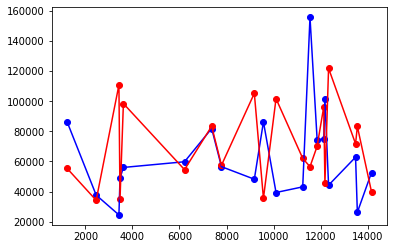

In [94]:
plt.figure()
plt.scatter(df_sample['index'],df_sample['y_test'],color="blue")
plt.plot(df_sample['index'],df_sample['y_test'],color="blue")
plt.scatter(df_sample['index'],df_sample['y_pred'],color="red")
plt.plot(df_sample['index'],df_sample['y_pred'],color="red")


In [95]:
dfx = dfx.sort_values(by=['index'], ascending=True)

In [96]:
dfx = dfx.head(100)

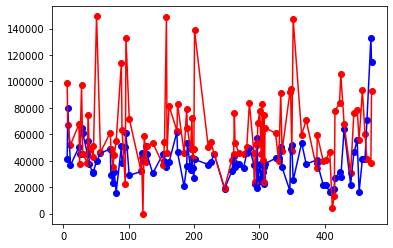

In [97]:
plt.figure()
plt.scatter(dfx['index'],dfx['y_test'],color="blue")
plt.plot(dfx['index'],dfx['y_test'],color="blue")
plt.scatter(dfx['index'],dfx['y_pred'],color="red")
plt.plot(dfx['index'],dfx['y_pred'],color="red")

In [104]:
np.unique(x_train, return_counts = True)

(array([0.00000000e+00, 3.05213039e-05, 3.45482812e-05, ...,
        9.98000000e-01, 9.99000000e-01, 1.00000000e+00]),
 array([3241497,       2,       2, ...,      47,      24,   59815]))

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [99]:
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

MemoryError: Unable to allocate 43.6 GiB for an array with shape (59200, 98770) and data type float64

In [ ]:
y_pred = polyreg.predict(x_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

In [ ]:
import matplotlib.pyplot as pltplt.figure()

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="black")
plt.title("Polynomial regression with degree "+str(degree))plt.show()

https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2